In [1]:
import pandas as pd
from google.cloud import bigquery

import matplotlib.pyplot as plt

client = bigquery.Client()

In [2]:
sintoma_geral_idade = """
select
 pk_indicador
,indicador
,variavel_abertura_1
,case when categoria_abertura_1 like '%59%' then 'ate 59 anos' else 'mais 60 anos' end as categoria_abertura_1
,variavel_abertura_2
,categoria_abertura_2
,cast(replace(maio,' ','') as int) as maio
,cast(replace(junho,' ','') as int) as junho
,cast(replace(julho,' ','') as int) as julho
 from `pnad_covid.tb_pais`
where
tipo_dado = 'quantidade' and
maio is not null and junho is not null and julho is not null
and pk_indicador = 107
and variavel_abertura_1 = 'Grupos de Idade 2'
and categoria_abertura_2 is not null
order by variavel_abertura_1,indicador
"""

df_sintoma_geral_idade= client.query(sintoma_geral_idade).to_dataframe()

#60 anos

In [3]:
df_mais_60 = df_sintoma_geral_idade[df_sintoma_geral_idade['categoria_abertura_1'].isin(['mais 60 anos'])]

In [4]:
df_mais_60 = pd.melt(df_mais_60,id_vars=['pk_indicador','indicador','variavel_abertura_1','categoria_abertura_1','variavel_abertura_2','categoria_abertura_2'],var_name = 'mes',value_name='qtd')

###DF MAIO

In [5]:
df_mais_60_maio = df_mais_60[df_mais_60['mes']=='maio']

In [6]:
df_mais_60_maio['Total'] = df_mais_60_maio['qtd'].sum()

<ipython-input-6-3693d7bca3d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mais_60_maio['Total'] = df_mais_60_maio['qtd'].sum()


In [7]:
df_mais_60_maio['%'] = (df_mais_60_maio['qtd'] / df_mais_60_maio['Total']) *100
df_mais_60_maio['%'] = df_mais_60_maio['%'].round(2)

<ipython-input-7-ed1a8a055814>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mais_60_maio['%'] = (df_mais_60_maio['qtd'] / df_mais_60_maio['Total']) *100
<ipython-input-7-ed1a8a055814>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mais_60_maio['%'] = df_mais_60_maio['%'].round(2)


In [8]:
df_mais_60_maio

,pk_indicador,indicador,variavel_abertura_1,categoria_abertura_1,variavel_abertura_2,categoria_abertura_2,mes,qtd,Total,%
0,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,Não foi a estabelecimento de saúde,maio,3015,3560,84.69
1,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,Foi a estabelecimento de saúde,maio,545,3560,15.31


###DF JUNHO

In [9]:
df_mais_60_junho = df_mais_60[df_mais_60['mes']=='junho']
df_mais_60_junho['Total'] = df_mais_60_junho['qtd'].sum()
df_mais_60_junho['%'] = (df_mais_60_junho['qtd'] / df_mais_60_junho['Total']) *100
df_mais_60_junho['%'] = df_mais_60_junho['%'].round(2)
df_mais_60_junho.set_index('categoria_abertura_2',inplace = True)
df_mais_60_junho

<ipython-input-9-4826592f06c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mais_60_junho['Total'] = df_mais_60_junho['qtd'].sum()
<ipython-input-9-4826592f06c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mais_60_junho['%'] = (df_mais_60_junho['qtd'] / df_mais_60_junho['Total']) *100
<ipython-input-9-4826592f06c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,pk_indicador,indicador,variavel_abertura_1,categoria_abertura_1,variavel_abertura_2,mes,qtd,Total,%
categoria_abertura_2,,,,,,,,,
Não foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,junho,1986,2451,81.03
Foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,junho,465,2451,18.97


###DF JULHO

In [10]:
df_mais_60_julho = df_mais_60[df_mais_60['mes']=='julho']
df_mais_60_julho['Total'] = df_mais_60_julho['qtd'].sum()
df_mais_60_julho['%'] = (df_mais_60_julho['qtd'] / df_mais_60_julho['Total']) *100
df_mais_60_julho['%'] = df_mais_60_julho['%'].round(2)
df_mais_60_julho.set_index('categoria_abertura_2',inplace = True)
df_mais_60_julho

<ipython-input-10-aeb5be8d21ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mais_60_julho['Total'] = df_mais_60_julho['qtd'].sum()
<ipython-input-10-aeb5be8d21ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mais_60_julho['%'] = (df_mais_60_julho['qtd'] / df_mais_60_julho['Total']) *100
<ipython-input-10-aeb5be8d21ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,pk_indicador,indicador,variavel_abertura_1,categoria_abertura_1,variavel_abertura_2,mes,qtd,Total,%
categoria_abertura_2,,,,,,,,,
Não foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,julho,1787,2254,79.28
Foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,julho,467,2254,20.72


###GRAFICO DE MAIO

In [11]:
df_mais_60_maio.set_index('categoria_abertura_2',inplace = True)

In [12]:
df_mais_60_maio

,pk_indicador,indicador,variavel_abertura_1,categoria_abertura_1,variavel_abertura_2,mes,qtd,Total,%
categoria_abertura_2,,,,,,,,,
Não foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,maio,3015,3560,84.69
Foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,maio,545,3560,15.31


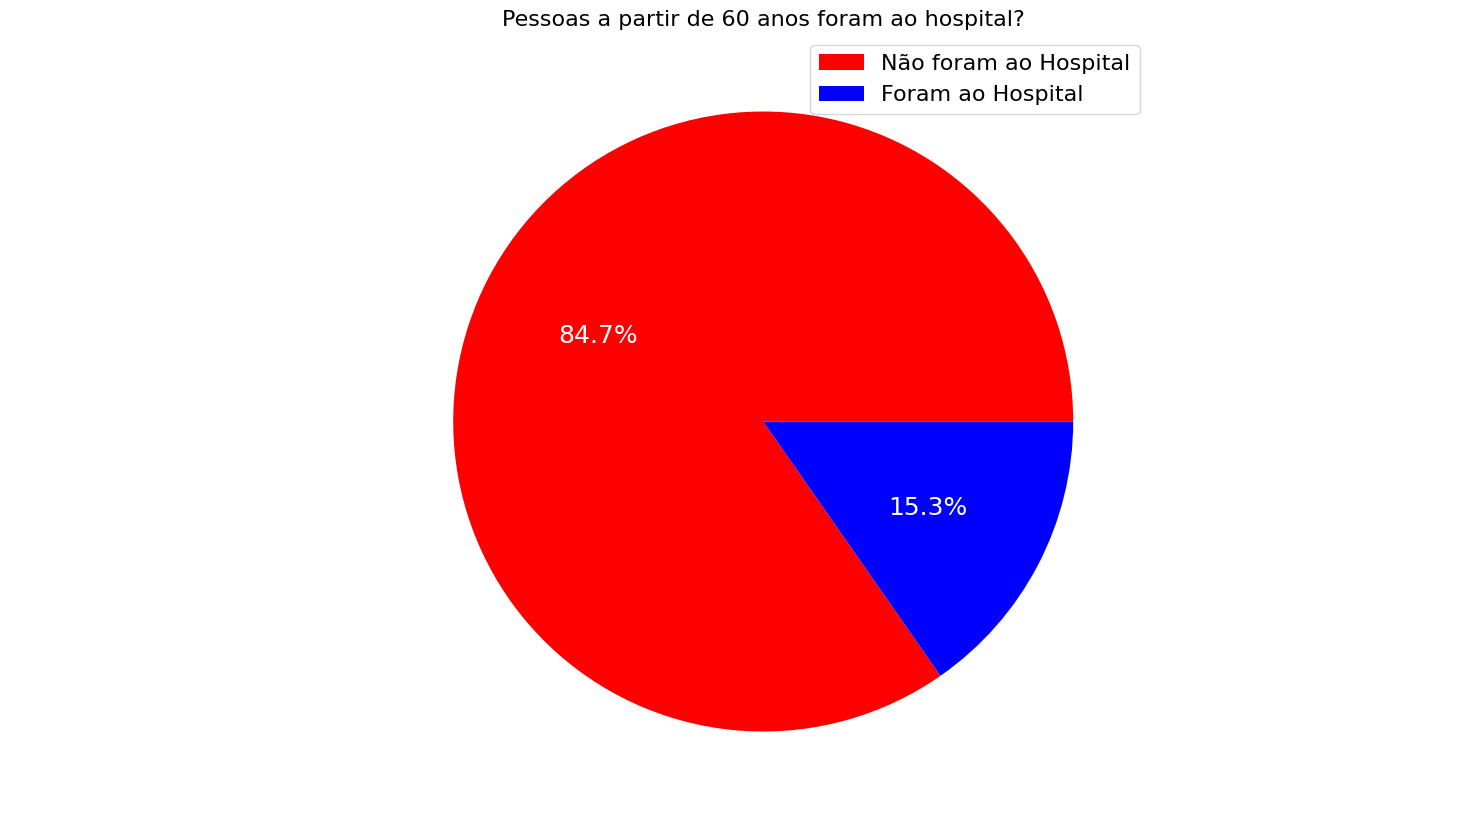

In [14]:
labels = ['Não foram ao Hospital', 'Foram ao Hospital']
sizes = [10,15]
colors = ['red', 'blue']



graf = df_mais_60_maio.plot.pie(y='qtd',x='mes',figsize=sizes, colors=colors, autopct='%1.1f%%',textprops={'color': 'white', 'fontsize': 18})
plt.title('Pessoas a partir de 60 anos foram ao hospital?',fontsize=16)
plt.axis('off')
plt.legend(labels, loc="best",fontsize=16)

plt.show()

##DF com os 3 meses

In [ ]:
df_sintomas_60_anos_geral = pd.concat([df_mais_60_maio,df_mais_60_junho,df_mais_60_julho])

In [ ]:
df_sintomas_60_anos_geral

,pk_indicador,indicador,variavel_abertura_1,categoria_abertura_1,variavel_abertura_2,mes,qtd,Total,%
categoria_abertura_2,,,,,,,,,
Não foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,maio,3015,3560,84.69
Foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,maio,545,3560,15.31
Não foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,junho,1986,2451,81.03
Foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,junho,465,2451,18.97
Não foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,julho,1787,2254,79.28
Foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,julho,467,2254,20.72


###Grafico de coluna dos 3 meses

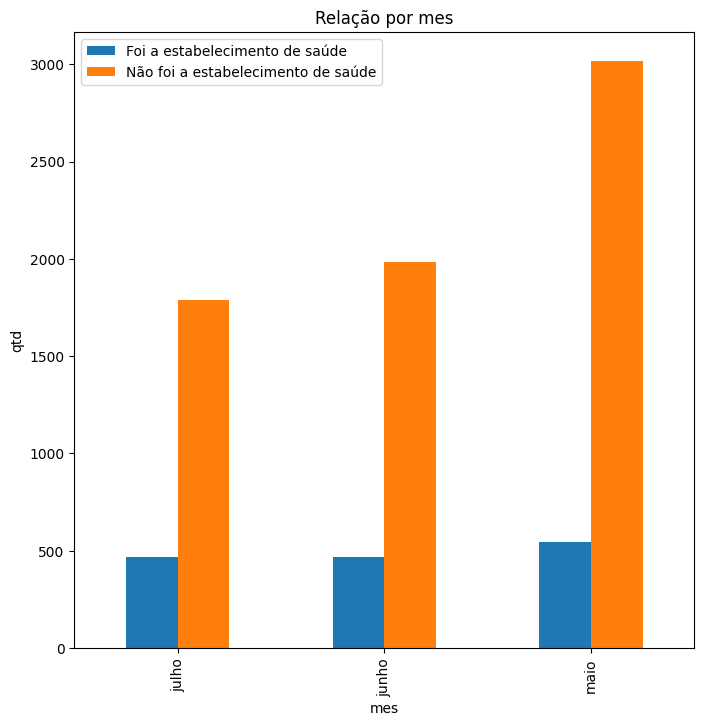

In [ ]:
pvt = df_sintomas_60_anos_geral.pivot_table(values = 'qtd', index = 'mes', columns = 'categoria_abertura_2')

pvt.plot(kind = 'bar',figsize=(8,8))
plt.title('Relação por mes')
plt.xlabel('mes')
plt.ylabel('qtd')
plt.legend(loc = 'best')

###Grafico de evolução da % dos que foram ao hospital

In [ ]:
df_sintomas_60_anos_geral.reset_index(inplace=True)

In [ ]:
df_sintomas_60_anos_foram = df_sintomas_60_anos_geral[df_sintomas_60_anos_geral['categoria_abertura_2'] == 'Foi a estabelecimento de saúde']

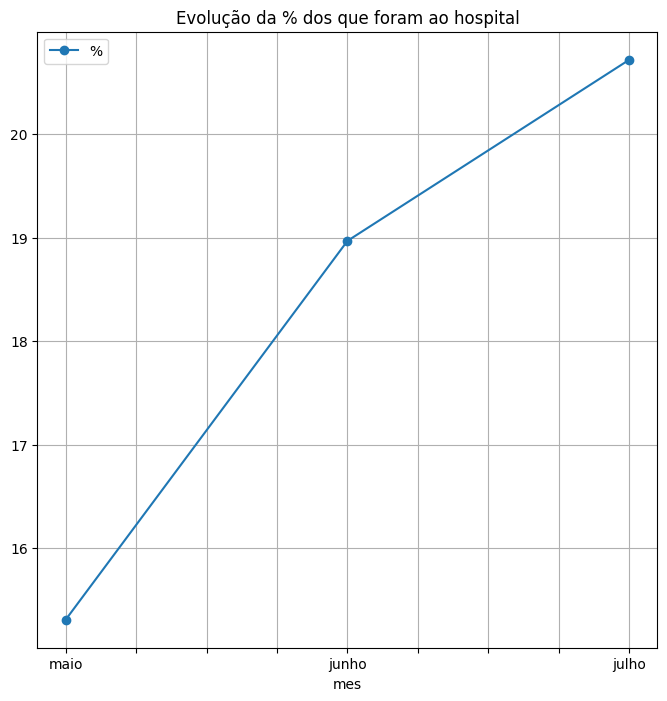

In [ ]:
df_sintomas_60_anos_foram.plot(kind='line',marker = 'o',figsize=(8,8),y='%',x='mes',)

plt.title('Evolução da % dos que foram ao hospital')
plt.legend(loc='best')
plt.grid(True)